# Assignment-04-Simple Linear Regression-2

In [1]:
# impoort libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# import dataset
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA and Data Visualization

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: >

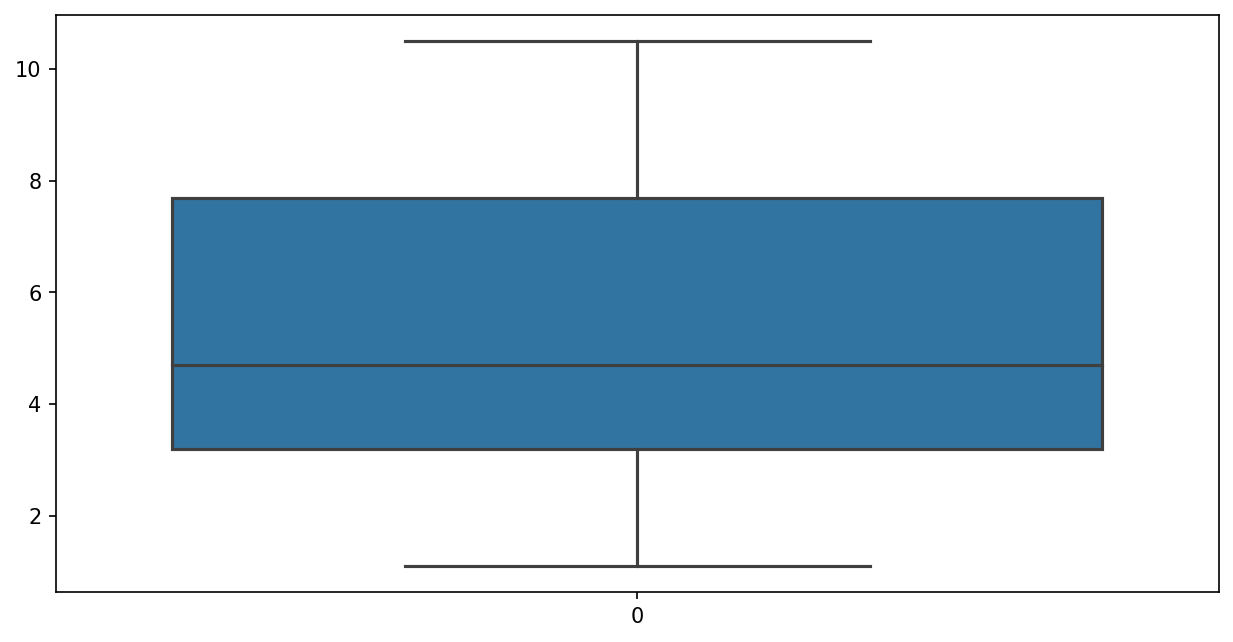

In [5]:
sns.boxplot(data=dataset['YearsExperience'])

<Axes: >

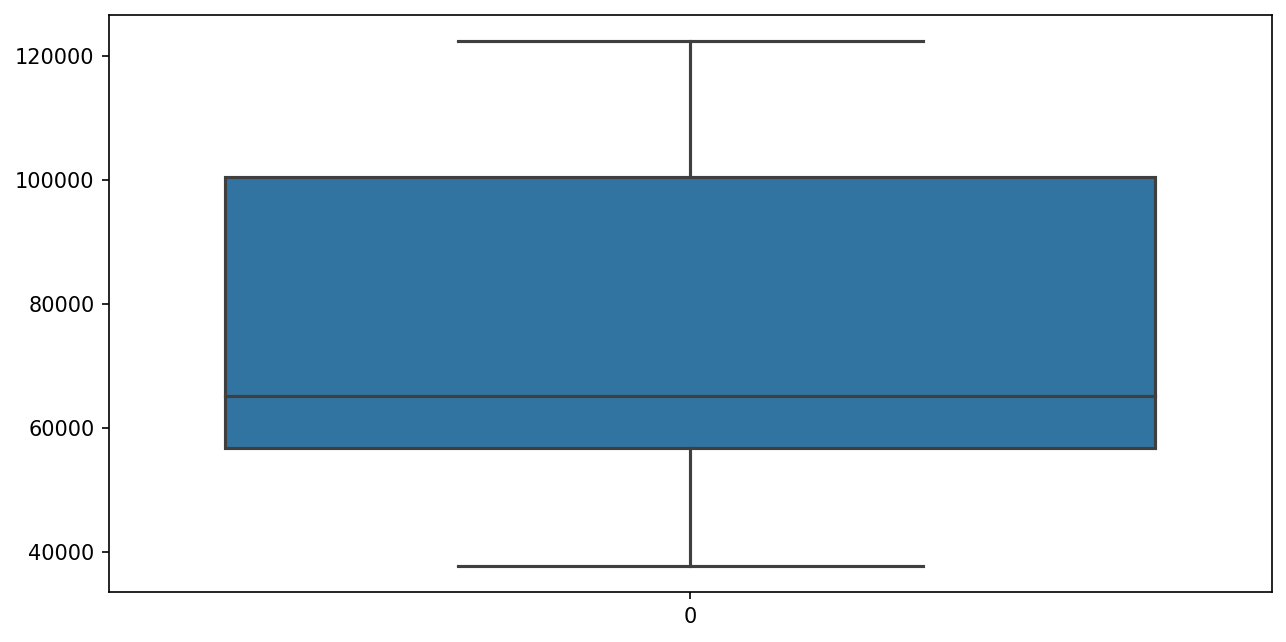

In [6]:
sns.boxplot(data=dataset['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

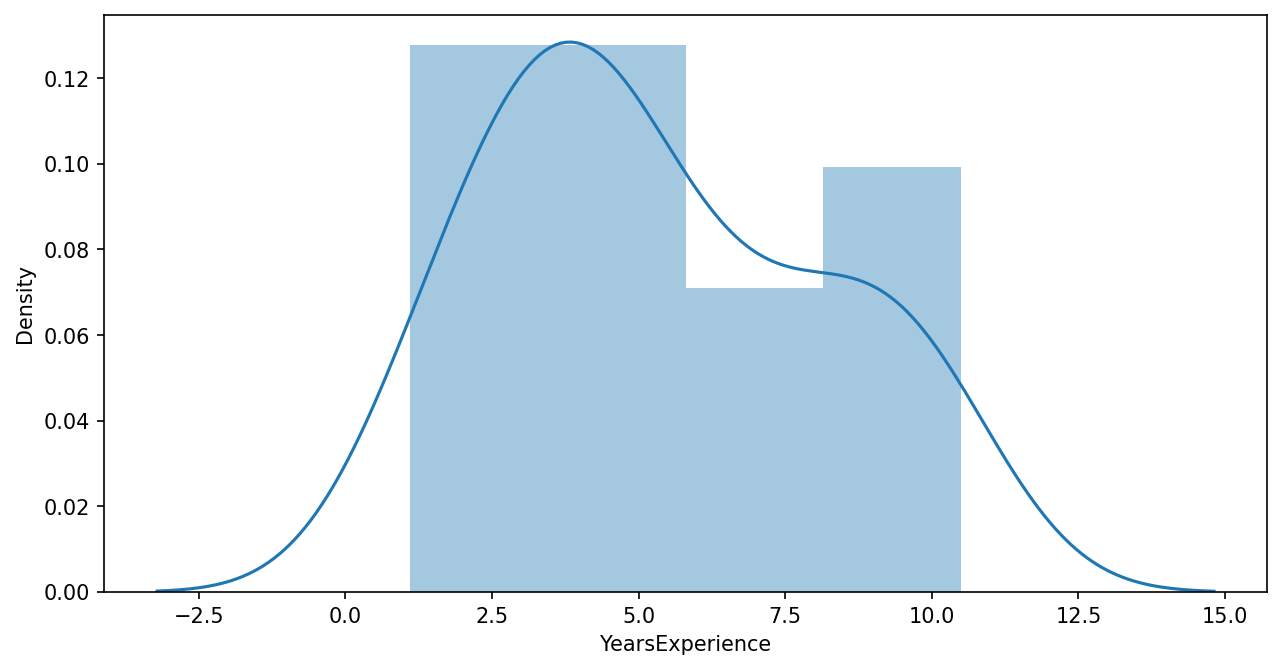

In [7]:
sns.distplot(dataset['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

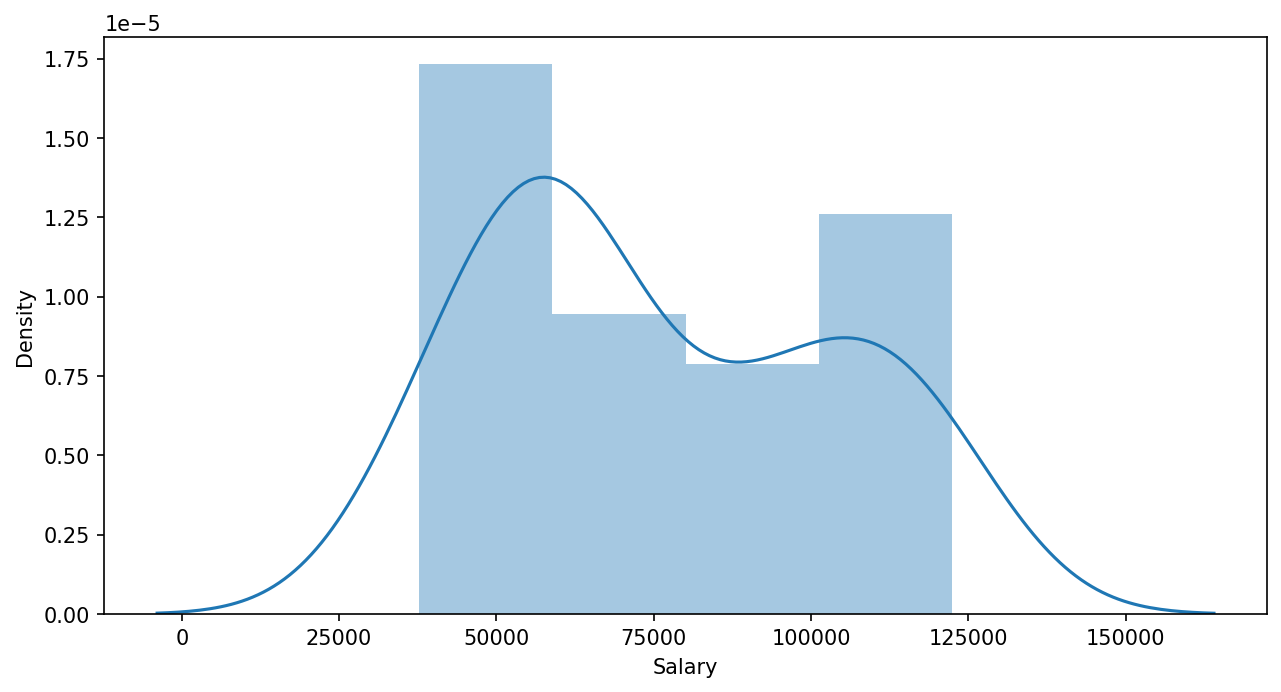

In [8]:
sns.distplot(dataset['Salary'])

## Correlation Analysis

In [9]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

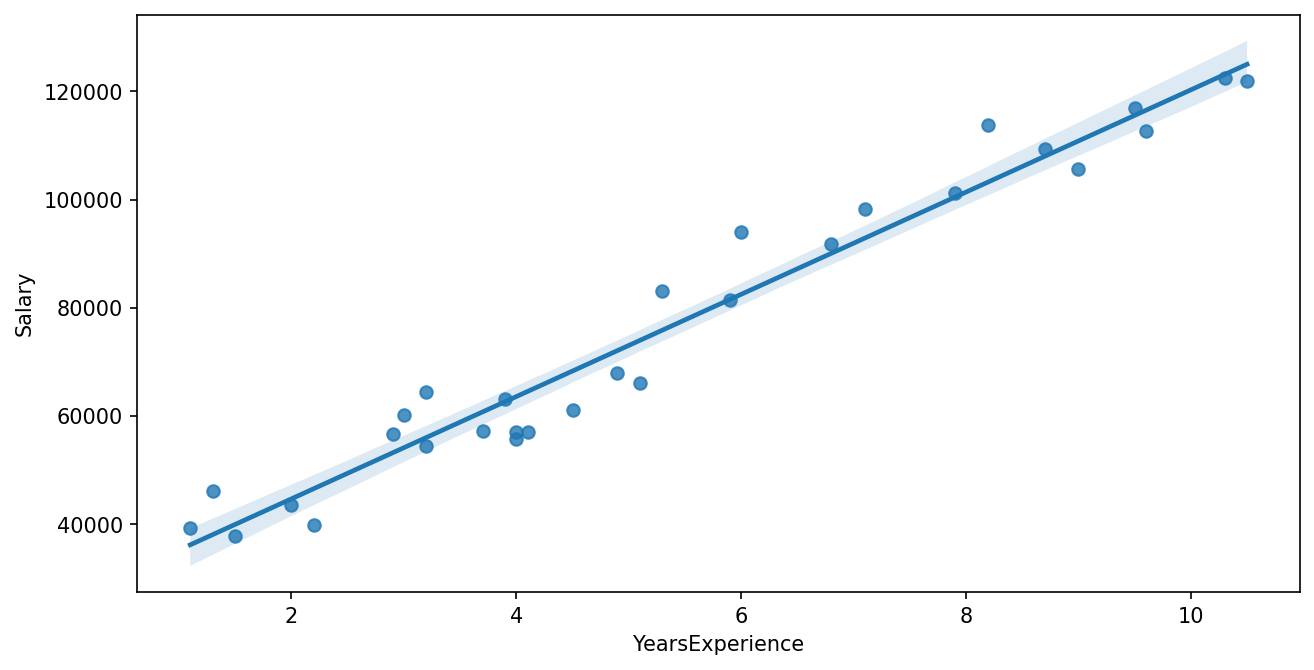

In [10]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

## Model Building Using Log Transformation

In [11]:
model = smf.ols('Salary~np.log(YearsExperience)',data=dataset).fit()

In [12]:
model.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           3.25e-13
Time:                        20:09:41   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print(model.conf_int(0.01)) # 99% confidence level

                                    0             1
Intercept                  679.965646  29175.977894
np.log(YearsExperience)  31815.666558  49348.309362


In [15]:
pred2 = model.predict(pd.DataFrame(dataset['YearsExperience']))
pred2.corr(dataset['Salary'])

0.9240610817882637

In [16]:
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

## Model Testing

In [17]:
# Finding Cefficient Parameters
model.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [18]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept                   2.895135
 np.log(YearsExperience)    12.791989
 dtype: float64,
 Intercept                  7.268813e-03
 np.log(YearsExperience)    3.250155e-13
 dtype: float64)

In [19]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

## Model Predictions

In [20]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [21]:
# Automatic Prediction for say 3 & 5 Years Experience 

In [22]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [23]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [24]:
model.predict(data_pred)

0    59511.842441
1    80242.161754
dtype: float64

In [25]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.8538888828756969, 0.8486706286926861)